In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [357]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/heartrate vs r-r values/2000-3000.csv")

In [358]:
df.head(1000)

,heartrate,rrvalues
0,89.6223,0.670
1,88.9342,0.674
2,88.4396,0.679
3,84.6681,0.708
4,82.4786,0.728
...,...,...
995,85.2453,0.704
996,84.8648,0.707
997,85.6165,0.700
998,83.7169,0.717


In [359]:
df.describe()

,heartrate,rrvalues
count,1000.000000,1000.000000
mean,79.188330,0.760341
std,4.651062,0.045397
min,65.432800,0.641000
25%,76.718450,0.732000
50%,79.281800,0.757000
75%,81.930450,0.782000
max,93.688000,0.917000


In [360]:
df.shape


(1000, 2)

In [361]:
cdf = df[['heartrate','rrvalues']]
cdf.head(5)

,heartrate,rrvalues
0,89.6223,0.670
1,88.9342,0.674
2,88.4396,0.679
3,84.6681,0.708
4,82.4786,0.728


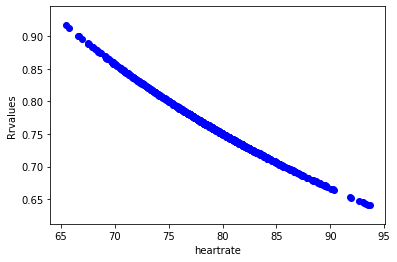

In [362]:
#graph of SNO vs r-r values

plt.scatter(cdf.heartrate, cdf.rrvalues,color='blue')
plt.xlabel('heartrate')
plt.ylabel('Rrvalues')
plt.show()

In [346]:
#splitting our data in 80-20 ratio for regression

In [363]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

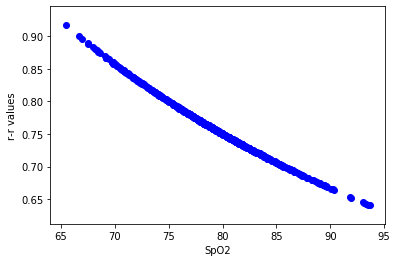

In [364]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.heartrate, train.rrvalues,  color='blue')
plt.xlabel("SpO2")
plt.ylabel("r-r values")
plt.show()

In [365]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['heartrate']])
train_y = np.asanyarray(train[['rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00964923]]
Intercept:  [1.52438315]


Text(0, 0.5, 'r-r values')

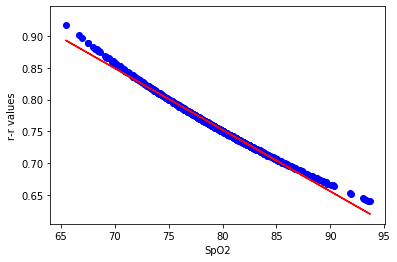

In [366]:
plt.scatter(train.heartrate, train.rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("SpO2")
plt.ylabel("r-r values")

In [367]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['heartrate']])
test_y = np.asanyarray(test[['rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 0.99


In [368]:
#using polynomial regression

In [369]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['heartrate']])
train_y = np.asanyarray(train[['rrvalues']])

test_x = np.asanyarray(test[['heartrate']])
test_y = np.asanyarray(test[['rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 8.96223000e+01, 8.03215666e+03],
       [1.00000000e+00, 8.89342000e+01, 7.90929193e+03],
       [1.00000000e+00, 8.84396000e+01, 7.82156285e+03],
       ...,
       [1.00000000e+00, 8.56165000e+01, 7.33018507e+03],
       [1.00000000e+00, 8.37169000e+01, 7.00851935e+03],
       [1.00000000e+00, 8.12430000e+01, 6.60042505e+03]])

In [370]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         -0.02877999  0.00012062]]
Intercept:  [2.28040416]


Text(0, 0.5, 'r-rvalues')

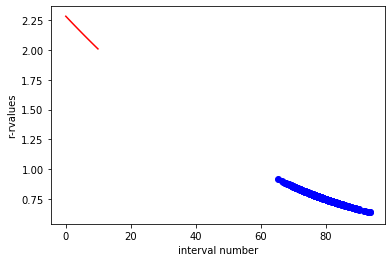

In [371]:
#plotting the polynomial regression
plt.scatter(train.heartrate, train.rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("interval number")
plt.ylabel("r-rvalues")

In [372]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.00
